In [12]:
# Reads the netCDF file using xarray

import xarray as xr
import pandas as pd
import netCDF4 as nc
# Read the netCDF file
import matplotlib.pyplot as plt


In [13]:
ds = xr.open_dataset('./adaptor.mars.internal-1689928755.3643763-9416-13-48dc969f-c9f8-4b99-94ed-676b949182d2.nc')

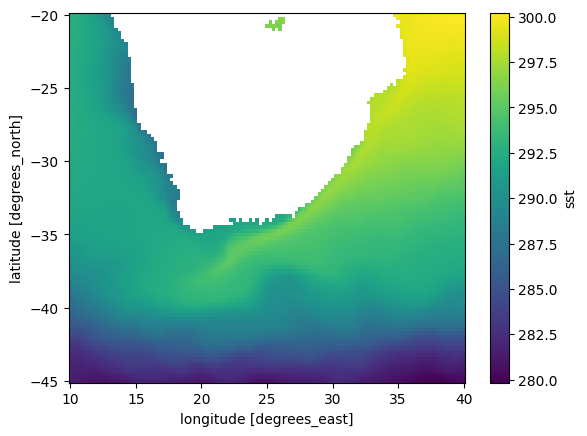

In [23]:
ds_sa=ds.sel(latitude=slice(-20,-45), longitude=slice(10,40))
ds_sa=ds_sa.sel(time=slice('2013-01-01','2015-01-01'))
ds_sa.mean(dim='time').sst.plot()

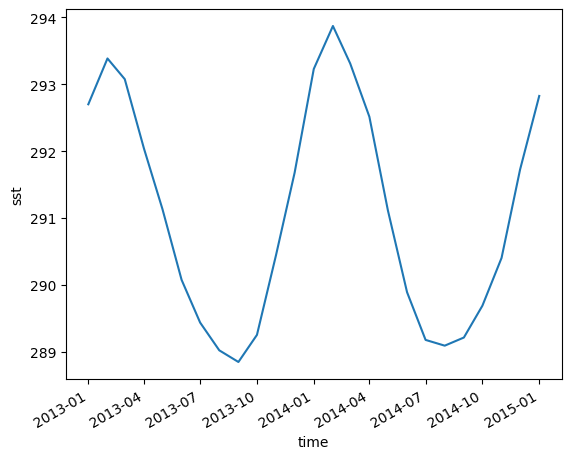

In [24]:
ds_sa.mean(dim=['latitude', 'longitude']).sst.plot()

In [33]:
sst_df = ds_sa.to_dataframe()
sst_df = sst_df.reset_index()

df_no_empty_cells = sst_df.dropna()

# Save the DataFrame without empty cells to a CSV file
df_no_empty_cells.to_csv('data_without_empty_cells.csv', index=False)

sst_df.to_csv('sst_southafrica.csv', index=False)


In [31]:
# Read csv into dataframe
df = pd.read_csv('sst_southafrica.csv')

A subdirectory or file images already exists.
c:\Users\mvall\Pycharm Projects\ChatbotTest\venv\lib\site-packages\contextily\tile.py:581: UserWarning: The inferred zoom level of 27 is not valid for the current tile provider (valid zooms: 0 - 20).
  warnings.warn(msg)
c:\Users\mvall\Pycharm Projects\ChatbotTest\venv\lib\site-packages\contextily\tile.py:581: UserWarning: The inferred zoom level of 27 is not valid for the current tile provider (valid zooms: 0 - 20).
  warnings.warn(msg)
c:\Users\mvall\Pycharm Projects\ChatbotTest\venv\lib\site-packages\contextily\tile.py:581: UserWarning: The inferred zoom level of 27 is not valid for the current tile provider (valid zooms: 0 - 20).
  warnings.warn(msg)
c:\Users\mvall\Pycharm Projects\ChatbotTest\venv\lib\site-packages\contextily\tile.py:581: UserWarning: The inferred zoom level of 27 is not valid for the current tile provider (valid zooms: 0 - 20).
  warnings.warn(msg)
c:\Users\mvall\Pycharm Projects\ChatbotTest\venv\lib\site-packages\con

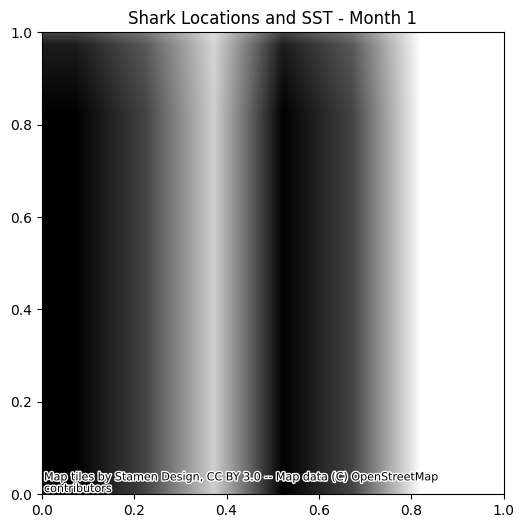

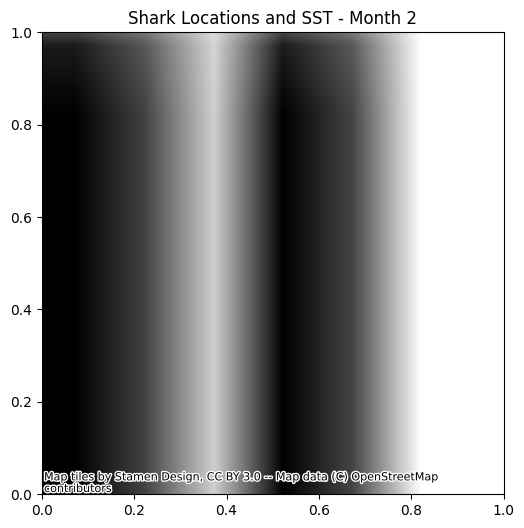

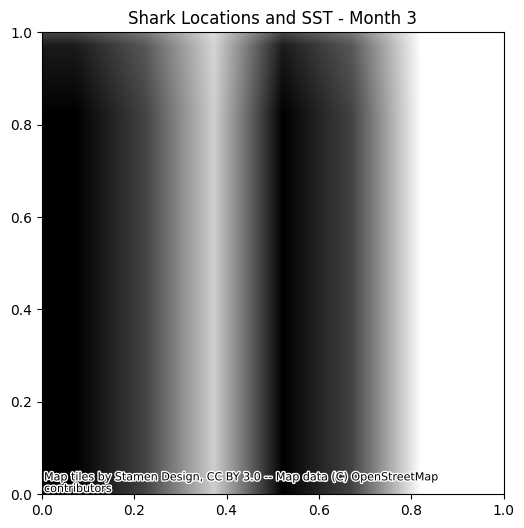

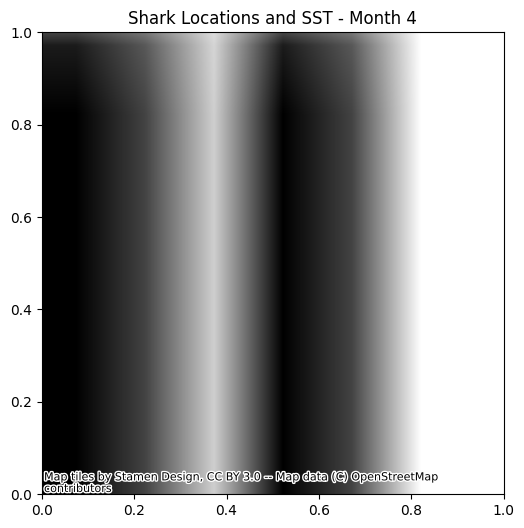

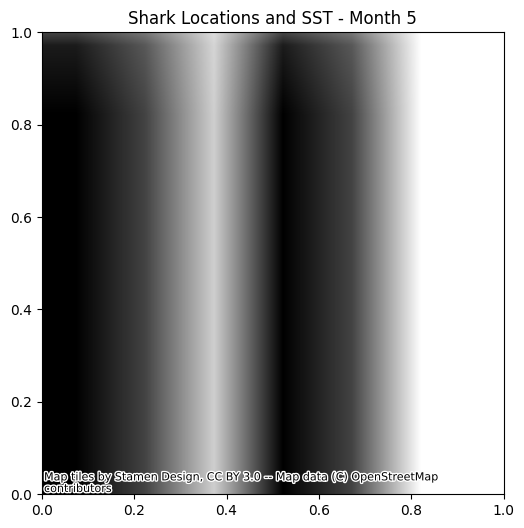

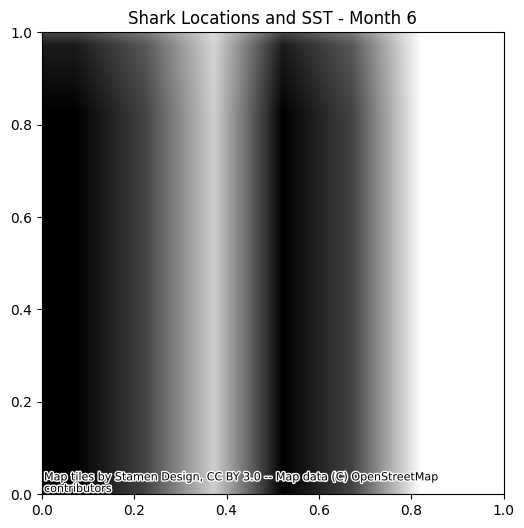

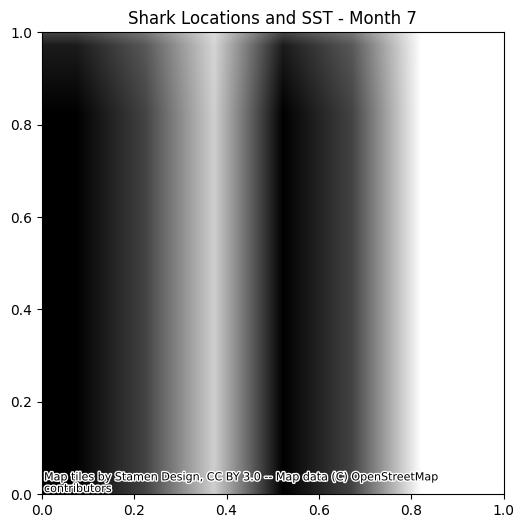

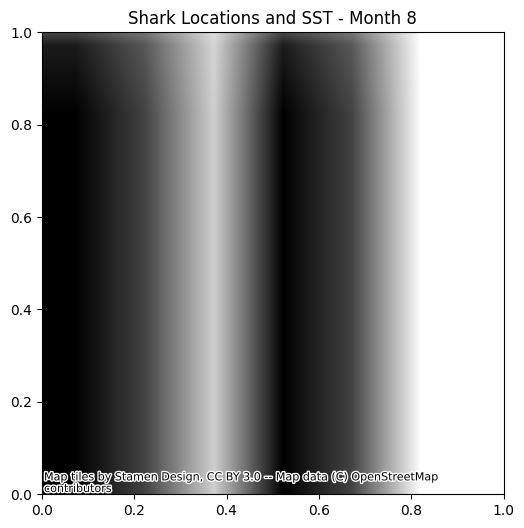

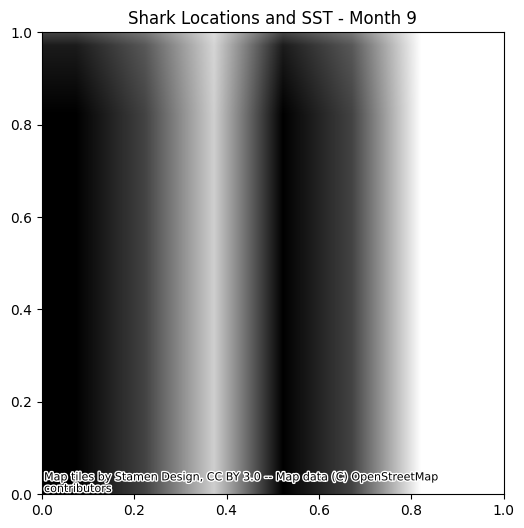

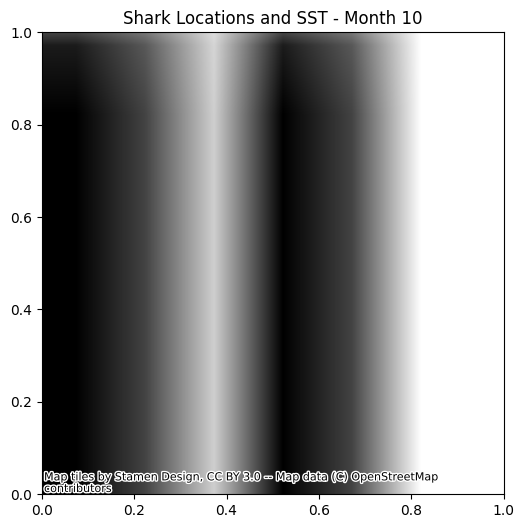

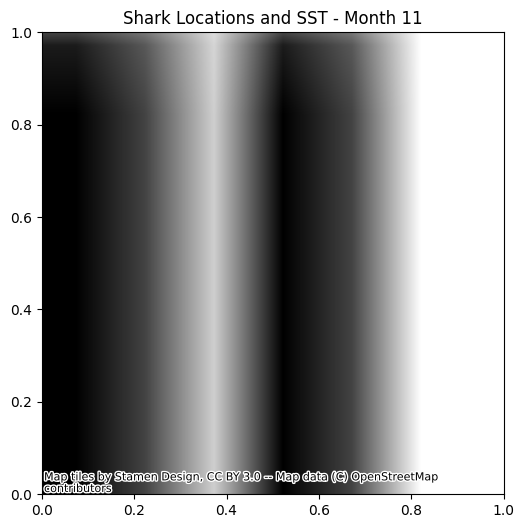

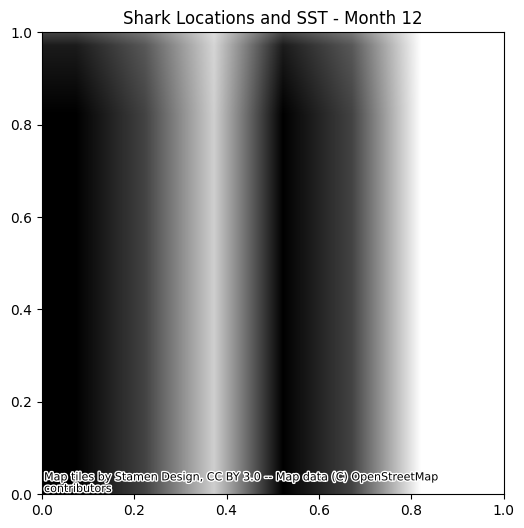

In [37]:
import pandas as pd
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt
from rasterio.plot import show
import imageio
import rasterio
from rasterio.transform import from_origin

# Load the data
sst_data = pd.read_csv('data_without_empty_cells.csv')
shark_data = pd.read_csv('sharks.csv')

# Add 'month' column to the dataframes
sst_data['month'] = pd.to_datetime(sst_data['time']).dt.month
shark_data['month'] = pd.to_datetime(shark_data['datetime']).dt.month

# Convert the data to GeoDataFrames
gdf_sst = gpd.GeoDataFrame(sst_data, geometry=gpd.points_from_xy(sst_data.longitude, sst_data.latitude))
gdf_sharks = gpd.GeoDataFrame(shark_data, geometry=gpd.points_from_xy(shark_data.longitude, shark_data.latitude))

# Set the coordinate reference system (CRS) to WGS84
gdf_sst.set_crs("EPSG:4326", inplace=True)
gdf_sharks.set_crs("EPSG:4326", inplace=True)

# Convert the CRS to Web Mercator for compatibility with contextily
gdf_sst = gdf_sst.to_crs(epsg=3857)
gdf_sharks = gdf_sharks.to_crs(epsg=3857)

# Create a new directory for the images
!mkdir images

# Create a scatter plot for each month
for month in range(1, 13):
    # Filter the data for the current month
    gdf_sst_month = gdf_sst[gdf_sst['month'] == month]
    gdf_sharks_month = gdf_sharks[gdf_sharks['month'] == month]

    # Create a figure and axes
    fig, ax = plt.subplots(figsize=(10, 6))

    # Add a base map
    ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite)

    # Create a scatter plot of the SST data
    gdf_sst_month.plot(ax=ax, markersize='sst', alpha=0.5, cmap='coolwarm')

    # Plot the shark locations
    gdf_sharks_month.plot(ax=ax, color='black', alpha=0.5)

    # Set the title
    ax.set_title(f'Shark Locations and SST - Month {month}')

    # Save the plot as an image
    plt.savefig(f'images/month_{month}.png')

# Combine the images into a GIF
images = [imageio.imread(f'images/month_{month}.png') for month in range(1, 13)]
imageio.mimsave('shark_sst.gif', images, duration=2)


In [2]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from ipywidgets import interact
from ipywidgets import widgets


# Load the data
sst_data = pd.read_csv('./data_without_empty_cells.csv')
# Convert the 'time' column to datetime format
sst_data['time'] = pd.to_datetime(sst_data['time'], format='%Y%m%d')

# Filter the data for January 2013
sst_jan_2013 = sst_data[sst_data['time'].dt.year == 2013]
sst_jan_2013 = sst_jan_2013[sst_jan_2013['time'].dt.month == 1]

# Create a pivot table with latitude and longitude
sst_pivot = sst_jan_2013.pivot('latitude', 'longitude', 'sst')

# Plot a heatmap of the SST data
plt.figure(figsize=(10, 6))
sns.heatmap(sst_pivot, cmap='coolwarm')
plt.title('Sea Surface Temperature for January 2013')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

ValueError: time data "2013-01-01" doesn't match format "%Y%m%d", at position 0. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.